In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../train/train.csv', index_col=0)
df.head()

,x,y,label
0,1.764052,-3.552990,0
1,0.400157,-0.346381,0
2,0.978738,-0.135564,0
3,2.240893,-1.742165,0
4,1.867558,1.269755,0


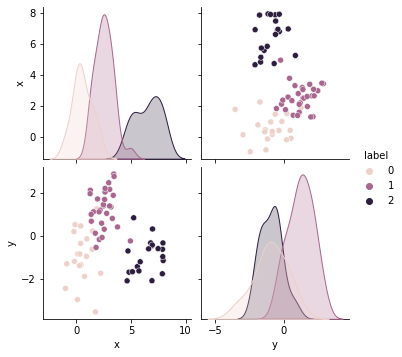

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data=df, hue='label')
plt.show()

/Users/ryotaroshima/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


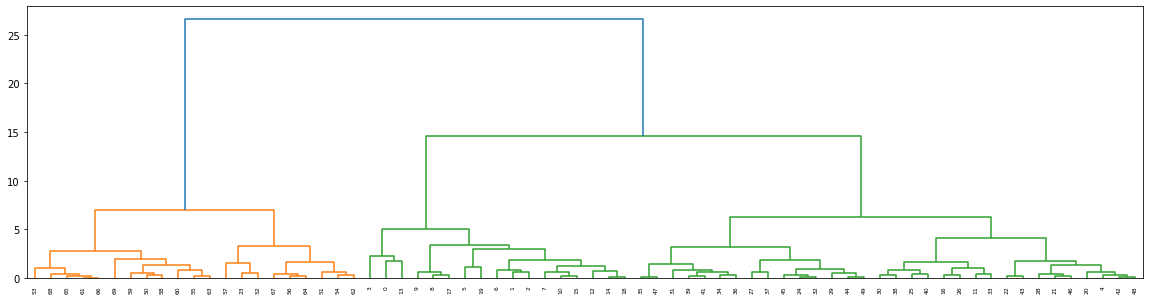

In [3]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
#引数でウォード法を指定
Z = linkage(df[['x','y']], method='ward', metric='euclidean')

fig2, ax2 = plt.subplots(figsize=(20,5))
ax2 = dendrogram(Z)
fig2.show()

In [4]:
#引数のcriterionにてクラスタリングのやり方を指定（今回は最大クラスタ数がt個となるようにクラスタリング）
#引数のtで閾値を指定（今回は最大クラスタ数を指定）
F = fcluster(Z, t = 3, criterion = 'maxclust')
print(F)

[2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
#正解と比較する
s_result = pd.Series(F,name='label_result').replace({2:0, 3:1, 1:2})
df_result = pd.concat([df,s_result], axis=1)
pd.set_option('display.max_rows', 70)
df_result

,x,y,label,label_result
0,1.764052,-3.552990,0,0
1,0.400157,-0.346381,0,0
2,0.978738,-0.135564,0,0
3,2.240893,-1.742165,0,0
4,1.867558,1.269755,0,1
5,-0.977278,-2.454366,0,0
6,0.950088,-0.954241,0,0
7,-0.151357,-1.187184,0,0
8,-0.103219,0.532779,0,0
9,0.410599,0.469359,0,0
